# IMDB Binary Classification
## Deep Learning w/ Keras
### Deep Learning w/ Keras_ Ch3.3.1 pg.68
### Dataset: 50000(train/test (%): 50/50)

In [1]:
# Step 01: Loading the IMDB dataset 

from tensorflow import keras
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [2]:
# Step 02: Preparing the data
import numpy as np
def vectorize_sequences(sequences, dimensions= 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)
x_train[0]

y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [3]:
# Step 03: Building your network
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics=['accuracy'])

In [4]:
# Using custom optimizer (?), loss & metrics
# from keras import optimizers -> ????
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])

In [5]:
# Step 04: Validation the Approach
x_val= x_train[:10000]
partial_x_train= x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [6]:
# Step 05: Training the Model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history= model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4924 - acc: 0.7853 - val_loss: 0.3624 - val_acc: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2824 - acc: 0.9034 - val_loss: 0.2925 - val_acc: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2065 - acc: 0.9312 - val_loss: 0.3030 - val_acc: 0.8754
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1618 - acc: 0.9485 - val_loss: 0.2775 - val_acc: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1328 - acc: 0.9551 - val_loss: 0.2984 - val_acc: 0.8799
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1132 - acc: 0.9637 - val_loss: 0.3048 - val_acc: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0915 - acc: 0.9711 - val_loss: 0.3403 - val_acc: 0.8794
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0750 - a

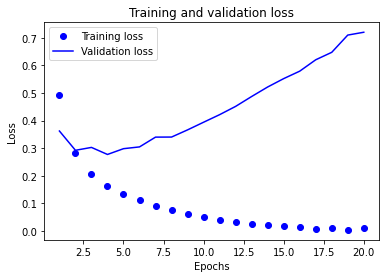

In [7]:
# Step 06: Plotting results
import matplotlib.pyplot as plt
history_dict= history.history
history_dict.keys()

loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']

epochs= range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

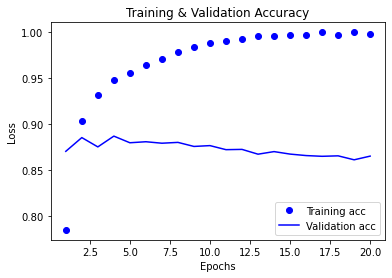

In [8]:
plt.clf()
acc_values= history_dict['acc']
val_acc_values= history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Step 07: Retraining a model from scratch
model= models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4473 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2537 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1976 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2951 - accuracy: 0.8833


[0.2951006293296814, 0.8832799792289734]

In [29]:
# Step 08: CH4- Regularization: Different Network Size
# Larger model has noisy validation loss graph
# Training Loss:
# Larger model's training loss becomes quickly zero, BUT 
# it is questionable in overfitting

# LARGER MODEL
print('LARGER MODEL\n')
L_model= models.Sequential()
L_model.add(layers.Dense(512, activation= 'relu', input_shape=(10000,)))
L_model.add(layers.Dense(512, activation= 'relu'))
L_model.add(layers.Dense(1, activation= 'sigmoid'))
L_model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])
L_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
L_history= L_model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

L_history_dict= L_history.history
L_history_dict.keys()

L_loss_values= L_history_dict['loss']
L_val_loss_values= L_history_dict['val_loss']

L_epochs= range(1, len(L_history_dict['acc'])+1)

# SMALLER MODEL
print('\nSMALLER MODEL\n')
s_model= models.Sequential()
s_model.add(layers.Dense(4, activation= 'relu', input_shape=(10000,)))
s_model.add(layers.Dense(4, activation= 'relu'))
s_model.add(layers.Dense(1, activation= 'sigmoid'))
s_model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])
s_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
s_history= s_model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

s_history_dict= s_history.history
s_history_dict.keys()

s_loss_values= s_history_dict['loss']
s_val_loss_values= s_history_dict['val_loss']

s_epochs= range(1, len(s_history_dict['acc'])+1)


LARGER MODEL

Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.5405 - acc: 0.7577 - val_loss: 0.3286 - val_acc: 0.8822
Epoch 2/20
30/30 [==============================] - 2s 81ms/step - loss: 0.2558 - acc: 0.9047 - val_loss: 0.2739 - val_acc: 0.8858
Epoch 3/20
30/30 [==============================] - 3s 87ms/step - loss: 0.1443 - acc: 0.9456 - val_loss: 0.2962 - val_acc: 0.8837
Epoch 4/20
30/30 [==============================] - 3s 85ms/step - loss: 0.0767 - acc: 0.9739 - val_loss: 0.4111 - val_acc: 0.8798
Epoch 5/20
30/30 [==============================] - 2s 83ms/step - loss: 0.0853 - acc: 0.9768 - val_loss: 0.3244 - val_acc: 0.8841
Epoch 6/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0049 - acc: 0.9996 - val_loss: 0.5181 - val_acc: 0.8880
Epoch 7/20
30/30 [==============================] - 2s 78ms/step - loss: 5.2304e-04 - acc: 1.0000 - val_loss: 0.6336 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 2s 81ms/step 

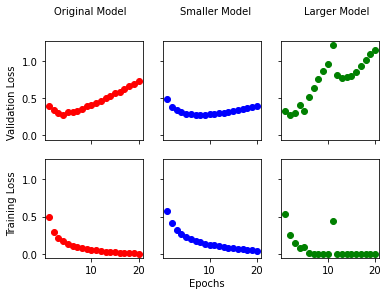

In [54]:
# PLOTTING
fig, axs= plt.subplots(2,3, sharex= True, sharey= True)
axs[0,0].plot(epochs, val_loss_values,'ro', label= 'Original Model')
axs[0,1].plot(s_epochs, s_val_loss_values,'bo', label= 'Smaller Model')
axs[0,2].plot(L_epochs, L_val_loss_values,'go', label= 'Larger Model')


axs[1,0].plot(epochs, loss_values,'ro', label= 'Original Model')
axs[1,1].plot(s_epochs, s_loss_values,'bo', label= 'Smaller Model')
axs[1,2].plot(L_epochs, L_loss_values,'go', label= 'Larger Model')


plt.figtext(.230,1, "Original Model\n", ha="center", va="top", fontsize=10)
plt.figtext(.520,1, "Smaller Model\n", ha="center", va="top", fontsize=10)
plt.figtext(.800,1, "Larger Model\n", ha="center", va="top", fontsize=10)

fig.text(0.5, 0.04, 'Epochs', ha='center', va='center')
fig.text(0.05, 0.5, 'Training Loss          Validation Loss', ha='center', va='center', rotation='vertical')
plt.show()

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6428 - acc: 0.6257 - val_loss: 0.5567 - val_acc: 0.8131
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5369 - acc: 0.7599 - val_loss: 0.4552 - val_acc: 0.8616
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4574 - acc: 0.8265 - val_loss: 0.3819 - val_acc: 0.8806
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3934 - acc: 0.8588 - val_loss: 0.3445 - val_acc: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3527 - acc: 0.8781 - val_loss: 0.3121 - val_acc: 0.8829
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3098 - acc: 0.8995 - val_loss: 0.2988 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2750 - acc: 0.9162 - val_loss: 0.2809 - val_acc: 0.8913
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2502 - a

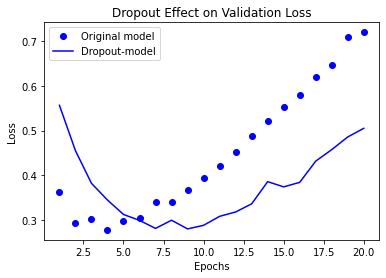

In [11]:
# Step 09: DROPOUT
import matplotlib.pyplot as plt
Dmodel= models.Sequential()
Dmodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Dmodel.add(layers.Dropout(0.5))
Dmodel.add(layers.Dense(16, activation='relu'))
Dmodel.add(layers.Dropout(0.5))
Dmodel.add(layers.Dense(1, activation='sigmoid'))

Dmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
Dhistory= Dmodel.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

Dhistory_dict= Dhistory.history
Dhistory_dict.keys()

Dloss_values= Dhistory_dict['loss']
Dval_loss_values= Dhistory_dict['val_loss']

Depochs= range(1, len(Dhistory_dict['acc'])+1)

plt.plot(epochs, val_loss_values, 'bo', label= 'Original model')
plt.plot(Depochs, Dval_loss_values, 'b', label= 'Dropout-model')
plt.title('Dropout Effect on Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Dropout= 0.1

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5546 - acc: 0.7523 - val_loss: 0.4206 - val_acc: 0.8576
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3541 - acc: 0.8763 - val_loss: 0.3156 - val_acc: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2656 - acc: 0.9090 - val_loss: 0.2821 - val_acc: 0.8894
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2071 - acc: 0.9300 - val_loss: 0.2717 - val_acc: 0.8910
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1669 - acc: 0.9438 - val_loss: 0.2858 - val_acc: 0.8852
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1357 - acc: 0.9548 - val_loss: 0.2875 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1147 - acc: 0.9630 - val_loss: 0.3119 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - lo

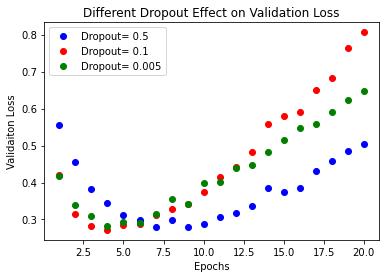

In [18]:
# Step 09 DROPOUT cont.
import matplotlib.pyplot as plt
print('Dropout= 0.1\n')
D1model= models.Sequential()
D1model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
D1model.add(layers.Dropout(0.1))
D1model.add(layers.Dense(16, activation='relu'))
D1model.add(layers.Dropout(0.1))
D1model.add(layers.Dense(1, activation='sigmoid'))

D1model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
D1history= D1model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

D1history_dict= D1history.history
D1history_dict.keys()

D1loss_values= D1history_dict['loss']
D1val_loss_values= D1history_dict['val_loss']

D1epochs= range(1, len(D1history_dict['acc'])+1)

print('\nDroput=0.005\n')
D2model= models.Sequential()
D2model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
D2model.add(layers.Dropout(0.005))
D2model.add(layers.Dense(16, activation='relu'))
D2model.add(layers.Dropout(0.005))
D2model.add(layers.Dense(1, activation='sigmoid'))

D2model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
D2history= D2model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

D2history_dict= D2history.history
D2history_dict.keys()

D2loss_values= D2history_dict['loss']
D2val_loss_values= D2history_dict['val_loss']

D2epochs= range(1, len(D2history_dict['acc'])+1)

plt.plot(Depochs, Dval_loss_values, 'bo', label= 'Dropout= 0.5')
plt.plot(D1epochs, D1val_loss_values, 'ro', label= 'Dropout= 0.1')
plt.plot(D2epochs, D2val_loss_values, 'go', label= 'Dropout= 0.005')
plt.title('Different Dropout Effect on Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validaiton Loss')
plt.legend()

plt.show()

LARGER MODEL_Dropout Layer

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.5468 - acc: 0.7345 - val_loss: 0.3110 - val_acc: 0.8742
Epoch 2/20
30/30 [==============================] - 2s 82ms/step - loss: 0.2942 - acc: 0.8819 - val_loss: 0.2740 - val_acc: 0.8878
Epoch 3/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1968 - acc: 0.9247 - val_loss: 0.2748 - val_acc: 0.8928
Epoch 4/20
30/30 [==============================] - 2s 83ms/step - loss: 0.1411 - acc: 0.9464 - val_loss: 0.3075 - val_acc: 0.8815
Epoch 5/20
30/30 [==============================] - 2s 83ms/step - loss: 0.1032 - acc: 0.9670 - val_loss: 0.3508 - val_acc: 0.8927
Epoch 6/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0869 - acc: 0.9733 - val_loss: 0.3610 - val_acc: 0.8901
Epoch 7/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0152 - acc: 0.9964 - val_loss: 0.6347 - val_acc: 0.8730
Epoch 8/20
30/30 [==============================] - 3s

<Figure size 432x288 with 0 Axes>

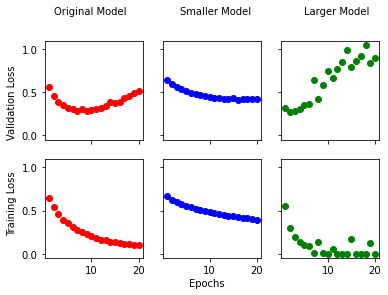

In [15]:
# STEP 9 cont. Dropout Effect on Different Size Network
# LARGER MODEL
print('LARGER MODEL_Dropout Layer\n')
DL_model= models.Sequential()
DL_model.add(layers.Dense(512, activation= 'relu', input_shape=(10000,)))
DL_model.add(layers.Dropout(0.5))
DL_model.add(layers.Dense(512, activation= 'relu'))
DL_model.add(layers.Dropout(0.5))
DL_model.add(layers.Dense(1, activation= 'sigmoid'))
DL_model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])
DL_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
DL_history= DL_model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

DL_history_dict= DL_history.history
DL_history_dict.keys()

DL_loss_values= DL_history_dict['loss']
DL_val_loss_values= DL_history_dict['val_loss']

DL_epochs= range(1, len(DL_history_dict['acc'])+1)

# SMALLER MODEL
print('\nSMALLER MODEL_Dropout Layer\n')
Ds_model= models.Sequential()
Ds_model.add(layers.Dense(4, activation= 'relu', input_shape=(10000,)))
Ds_model.add(layers.Dropout(0.5))
Ds_model.add(layers.Dense(4, activation= 'relu'))
Ds_model.add(layers.Dropout(0.5))
Ds_model.add(layers.Dense(1, activation= 'sigmoid'))
Ds_model.compile(optimizer='rmsprop', loss= losses.binary_crossentropy, metrics= [metrics.binary_accuracy])
Ds_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
Ds_history= Ds_model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val, y_val))

Ds_history_dict= Ds_history.history
Ds_history_dict.keys()

Ds_loss_values= Ds_history_dict['loss']
Ds_val_loss_values= Ds_history_dict['val_loss']

Ds_epochs= range(1, len(Ds_history_dict['acc'])+1)

# PLOTTING
plt.clf()
fig, axs= plt.subplots(2,3, sharex= True, sharey= True)
axs[0,0].plot(epochs, Dval_loss_values,'ro', label= 'Original Model')
axs[0,1].plot(Ds_epochs, Ds_val_loss_values,'bo', label= 'Smaller Model')
axs[0,2].plot(DL_epochs, DL_val_loss_values,'go', label= 'Larger Model')


axs[1,0].plot(epochs, Dloss_values,'ro', label= 'Original Model')
axs[1,1].plot(Ds_epochs, Ds_loss_values,'bo', label= 'Smaller Model')
axs[1,2].plot(DL_epochs, DL_loss_values,'go', label= 'Larger Model')


plt.figtext(.230,1, "Original Model\n", ha="center", va="top", fontsize=10)
plt.figtext(.520,1, "Smaller Model\n", ha="center", va="top", fontsize=10)
plt.figtext(.800,1, "Larger Model\n", ha="center", va="top", fontsize=10)

fig.text(0.5, 0.04, 'Epochs', ha='center', va='center')
fig.text(0.05, 0.5, 'Training Loss          Validation Loss', ha='center', va='center', rotation='vertical')
plt.show()